<a id='top'></a>

# Record Linkage of FBref and TransferMarkt Datasets
##### Notebook on how join the scraped datasets from [FBref.com](https://fbref.com/en/) provided by [StatsBomb](https://statsbomb.com/), and [TransferMarkt](https://www.transfermarkt.co.uk/)  through [RecordLinkage](https://pypi.org/project/recordlinkage/), to create one, unified source of information, that can be used for for further analysis of players statistics and financial valuations.

### By [Edd Webster](https://www.twitter.com/eddwebster)
Last updated: 01/09/2020

![title](../../img/plymouth_badge.jpg)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook is a short Exploratory Data Analysis (EDA) of scraped football statistics data from [FBref.com](https://fbref.com/en/), provided by [StatsBomb](https://statsbomb.com/), and [TransferMarkt](https://www.transfermarkt.co.uk/), using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames, [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping, [RecordLinkage](https://pypi.org/project/recordlinkage/) to join the fuzzy data sets, and [matplotlib](https://matplotlib.org/) to create custom visualisations.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [@eddwebster](https://www.twitter.com/eddwebster),
*    [LinkedIn.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/),
*    [GitHub/eddwebster](https://github.com/eddwebster/),
*    [Kaggle.com/eddwebster](https://www.kaggle.com/eddwebster), and
*    [HackerRank.com/eddwebster](https://www.hackerrank.com/eddwebster).

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/fifa-league) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/fifa-league/blob/master/FIFA%2020%20Fantasy%20Football%20League%20using%20TransferMarkt%20Player%20Valuations.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Teams](#section3.2)<br>
            1.    [Data Dictionary](#section3.2.1)<br>
            2.    [Creating the DataFrame](#section3.2.2)<br>
            3.    [Initial Data Handling](#section3.2.3)<br>
            4.    [Export the Raw DataFrame](#section3.2.4)<br>
      2.    [Outfielder Players](#section3.3)<br>
            1.    [Data Dictionary](#section3.3.1)<br>
            2.    [Creating the DataFrame](#section3.3.2)<br>
            3.    [Initial Data Handling](#section3.3.3)<br>
            4.    [Export the Raw DataFrame](#section3.3.4)<br>
      3.    [Goalkeepers](#section3.4)<br>
            1.    [Data Dictionary](#section3.4.1)<br>
            2.    [Creating the DataFrame](#section3.4.2)<br>
            3.    [Initial Data Handling](#section3.4.3)<br>
            4.    [Export the Raw DataFrame](#section3.4.4)<br> 
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Teams](#section4.2)<br>
            1.    [Columns of Interest](#section4.2.1)<br>
            2.    [String Cleaning](#section4.2.2)<br>
            3.    [Converting Data Types](#section4.2.3)<br>
            4.    [Export the Engineered DataFrame](#section4.2.4)<br>
      3.    [Outfielder Players](#section4.3)<br>
            1.    [Columns of Interest](#section4.3.1)<br>
            2.    [String Cleaning](#section4.3.2)<br>
            3.    [Converting Data Types](#section4.3.3)<br>
            4.    [Export the Engineered DataFrame](#section4.3.4)<br>
      4.    [Goalkeepers](#section4.4)<br>
            1.    [Columns of Interest](#section4.4.1)<br>
            2.    [String Cleaning](#section4.4.2)<br>
            3.    [Converting Data Types](#section4.4.3)<br>
            4.    [Export the Engineered DataFrame](#section4.4.4)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    `tqdm` for a clean progress bar;
*    `requests` for executing HTTP requests;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping;
*    [`RecordLinkage`](https://pypi.org/project/recordlinkage/) for joining of fuzzy datasets; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [61]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd    # version 1.0.3
import os    #  used to read the csv filenames
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # visually display missing data

# Progress Bar
from tqdm import tqdm    # a clean progress bar library

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables

In [62]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Define Data Paths

In [65]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_fbref = os.path.join(base_dir, 'data', 'fbref')
data_dir_tm = os.path.join(base_dir, 'data', 'tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook explores how to scrape football data from [FBref.com](https://fbref.com/en/), provided by [StatsBomb](https://statsbomb.com/), and [TransferMarkt](https://www.transfermarkt.co.uk/), using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames, [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping, [RecordLinkage](https://pypi.org/project/recordlinkage/) to join the fuzzy data sets, and [matplotlib](https://matplotlib.org/) to create custom visualisations. 

The aims of this notebook is to result in three, finalised datasets exported to CSV. This data can be further analysis using python (see [Section 6](#section6) of this notebook), or can be explored using Tableau, PowerBI, Microsoft Excel. These datasets are the following:
*    teams
*    outfield players
*    goalkeepers

These FBref webscrapers specially include the recently added extensive data of the top five leagues. The code for the FBref web scraping was written by [this](https://github.com/parth1902/Scrape-FBref-data) repository by [parth1902](https://github.com/parth1902) which in turn was taken from [this](https://github.com/chmartin/FBref_EPL) repository written by [chmartin](https://github.com/chmartin). The TransferMarkt webscraper was written by myself.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
This Data Sources section has been has been split into two subsections for the FBref and TransferMarkt datasets, and these are then broken down into ito subsections depending on the data type being scraped - team, outfielder, or goalkeeper for FBref and team and players for TransferMarkt.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and Cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

![title](../../img/fbref-logo-banner.png)

![title](../../img/stats-bomb-logo.png)

![title](../../img/transfermarkt-logo-banner.png)

### <a id='#section3.2'>3.2. FBref</a>
The FBref data comes in two forms:
*    outfield data
*    keeper data

#### <a id='#section3.2.1'>3.2.1. Import the Datasets</a>

In [13]:
df_fbref_outfield = pd.read_csv('../../data/fbref/engineered/outfield/player_big5_engineered_last_updated_30082020.csv')
df_fbref_goalkeeper = pd.read_csv('../../data/fbref/engineered/goalkeeper/goalkeeper_big5_engineered_last_updated_30082020.csv')

#### <a id='#section3.2.2'>3.2.2. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

##### Outfield

In [14]:
# Display the first 5 rows of the raw DataFrame, df_fbref_outfield
df_fbref_outfield.head()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,aerials_lost,aerials_won_pct,Season,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned
0,Yunis Abdelhamid,ma MAR,DF,Reims,32,1987,2.0,2.0,180.0,0.0,...,2.0,0.0,20/21,yunis abdelhamid,yunis,abdelhamid,y,MAR,Morocco,Defender
1,Mehdi Abeid,dz ALG,MF,Nantes,27,1992,1.0,0.0,35.0,0.0,...,0.0,0.0,20/21,mehdi abeid,mehdi,abeid,m,ALG,Algeria,Midfielder
2,Laurent Abergel,fr FRA,MF,Lorient,27,1993,2.0,1.0,169.0,0.0,...,3.0,25.0,20/21,laurent abergel,laurent,abergel,l,FRA,France,Midfielder
3,Nayef Aguerd,ma MAR,DF,Rennes,24,1996,2.0,2.0,180.0,0.0,...,5.0,64.3,20/21,nayef aguerd,nayef,aguerd,n,MAR,Morocco,Defender
4,Ruben Aguilar,fr FRA,DF,Monaco,27,1993,2.0,2.0,180.0,0.0,...,0.0,100.0,20/21,ruben aguilar,ruben,aguilar,r,FRA,France,Defender


In [16]:
# Display the last 5 rows of the raw DataFrame, df_fbref_outfield
df_fbref_outfield.tail()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,aerials_lost,aerials_won_pct,Season,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned
8396,Bongani Zungu,za RSA,MF,Amiens,24,1992,26.0,24.0,2084.0,1.0,...,10.0,63.0,17/18,bongani zungu,bongani,zungu,b,RSA,South Africa,Midfielder
8397,David Zurutuza,es ESP,MF,Real Sociedad,31,1986,31.0,26.0,2236.0,0.0,...,14.0,54.8,17/18,david zurutuza,david,zurutuza,d,ESP,Spain,Midfielder
8398,Filip Đuričić,rs SRB,"FW,MF",Benevento,25,1992,15.0,13.0,971.0,0.0,...,16.0,5.9,17/18,filip uricic,filip,uricic,f,SRB,Serbia,Forward
8399,Filip Đuričić,rs SRB,FW,Sampdoria,25,1992,1.0,0.0,7.0,0.0,...,0.0,0.0,17/18,filip uricic,filip,uricic,f,SRB,Serbia,Forward
8400,Christian Rutjens,0,0,Benevento,0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,17/18,christian rutjens,christian,rutjens,c,0,NaN,NaN


##### Goalkeeper

In [15]:
# Display the first 5 rows of the raw DataFrame, df_fbref_goalkeeper
df_fbref_goalkeeper.head()

,player,nationality,position,squad,age,birth_year,games_gk,games_starts_gk,minutes_gk,goals_against_gk,...,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,Season,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned
0,Walter Benítez,ar ARG,GK,Nice,27,1993,2.0,2.0,180.0,1.0,...,1.0,0.5,12.5,20/21,walter benitez,walter,benitez,w,ARG,Argentina
1,Paul Bernardoni,fr FRA,GK,Angers,23,1997,2.0,2.0,180.0,2.0,...,0.0,0.0,11.3,20/21,paul bernardoni,paul,bernardoni,p,FRA,France
2,Benoît Costil,fr FRA,GK,Bordeaux,33,1987,2.0,2.0,180.0,0.0,...,2.0,2.0,16.6,20/21,benoit costil,benoit,costil,b,FRA,France
3,Alfred Gomis,sn SEN,GK,Dijon,26,1993,2.0,2.0,180.0,5.0,...,1.0,0.5,10.0,20/21,alfred gomis,alfred,gomis,a,SEN,Senegal
4,Eiji Kawashima,jp JPN,GK,Strasbourg,37,1983,2.0,2.0,180.0,5.0,...,2.0,1.0,14.9,20/21,eiji kawashima,eiji,kawashima,e,JPN,Japan


In [17]:
# Display the last 5 rows of the raw DataFrame, df_fbref_goalkeeper
df_fbref_goalkeeper.tail()

,player,nationality,position,squad,age,birth_year,games_gk,games_starts_gk,minutes_gk,goals_against_gk,...,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,Season,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned
625,Yoel,es ESP,GK,Eibar,28,1988,1.0,1.0,90.0,1.0,...,3.0,3.00,16.3,17/18,yoel,yoel,yoel,y,ESP,Spain
626,Erwin Zelazny,fr FRA,GK,Troyes,25,1991,17.0,17.0,1530.0,28.0,...,9.0,0.53,15.2,17/18,erwin zelazny,erwin,zelazny,e,FRA,France
627,Robin Zentner,de GER,GK,Mainz 05,22,1994,15.0,15.0,1350.0,27.0,...,19.0,1.27,15.6,17/18,robin zentner,robin,zentner,r,GER,Germany
628,Luca Zidane,fr FRA,GK,Real Madrid,19,1998,1.0,1.0,90.0,2.0,...,0.0,0.00,11.2,17/18,luca zidane,luca,zidane,l,FRA,France
629,Ron-Robert Zieler,de GER,GK,Stuttgart,28,1989,34.0,34.0,3060.0,36.0,...,23.0,0.68,14.9,17/18,ron-robert zieler,ron-robert,zieler,r,GER,Germany


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [18]:
# Print the shape of the raw DataFrame, df_fbref_outfield
print(df_fbref_outfield.shape)

(8401, 159)


In [19]:
# Print the shape of the raw DataFrame, df_fbref_goalkeeper
print(df_fbref_goalkeeper.shape)

(630, 54)


[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [20]:
# Features (column names) of the raw DataFrame, df_fbref_outfield
df_fbref_outfield.columns

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games', 'games_starts', 'minutes', 'goals',
       ...
       'aerials_lost', 'aerials_won_pct', 'Season', 'player_lower',
       'firstname_lower', 'lastname_lower', 'firstinitial_lower',
       'nationality_code', 'nationality_cleaned', 'position_cleaned'],
      dtype='object', length=159)

In [21]:
# Features (column names) of the raw DataFrame, df_fbref_goalkeeper
df_fbref_goalkeeper.columns

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games_gk', 'games_starts_gk', 'minutes_gk', 'goals_against_gk',
       'goals_against_per90_gk', 'shots_on_target_against', 'saves',
       'save_pct', 'wins_gk', 'draws_gk', 'losses_gk', 'clean_sheets',
       'clean_sheets_pct', 'pens_att_gk', 'pens_allowed', 'pens_saved',
       'pens_missed_gk', 'minutes_90s_gk', 'free_kick_goals_against_gk',
       'corner_kick_goals_against_gk', 'own_goals_against_gk', 'psxg_gk',
       'psnpxg_per_shot_on_target_against', 'psxg_net_gk', 'psxg_net_per90_gk',
       'passes_completed_launched_gk', 'passes_launched_gk',
       'passes_pct_launched_gk', 'passes_gk', 'passes_throws_gk',
       'pct_passes_launched_gk', 'passes_length_avg_gk', 'goal_kicks',
       'pct_goal_kicks_launched', 'goal_kick_length_avg', 'crosses_gk',
       'crosses_stopped_gk', 'crosses_stopped_pct_gk',
       'def_actions_outside_pen_area_gk',
       'def_actions_outside_pen_area_per90_gk', 

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [22]:
# Data types of the features of the raw DataFrame, df_fbref_outfield
df_fbref_outfield.dtypes

player                 object
nationality            object
position               object
squad                  object
age                     int64
                        ...  
lastname_lower         object
firstinitial_lower     object
nationality_code       object
nationality_cleaned    object
position_cleaned       object
Length: 159, dtype: object

In [23]:
# Data types of the features of the raw DataFrame, df_fbref_goalkeeper
df_fbref_goalkeeper.dtypes

player                                    object
nationality                               object
position                                  object
squad                                     object
age                                        int64
birth_year                                 int64
games_gk                                 float64
games_starts_gk                          float64
minutes_gk                               float64
goals_against_gk                         float64
goals_against_per90_gk                   float64
shots_on_target_against                  float64
saves                                    float64
save_pct                                 float64
wins_gk                                  float64
draws_gk                                 float64
losses_gk                                float64
clean_sheets                             float64
clean_sheets_pct                         float64
pens_att_gk                              float64
pens_allowed        

In [24]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref_outfield.dtypes)

player                          object
nationality                     object
position                        object
squad                           object
age                              int64
birth_year                       int64
games                          float64
games_starts                   float64
minutes                        float64
goals                          float64
assists                        float64
pens_made                      float64
pens_att                       float64
cards_yellow                   float64
cards_red                      float64
goals_per90                    float64
assists_per90                  float64
goals_assists_per90            float64
goals_pens_per90               float64
goals_assists_pens_per90       float64
xg                             float64
npxg                           float64
xa                             float64
xg_per90                       float64
xa_per90                       float64
xg_xa_per90              

In [25]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref_goalkeeper.dtypes)

player                                    object
nationality                               object
position                                  object
squad                                     object
age                                        int64
birth_year                                 int64
games_gk                                 float64
games_starts_gk                          float64
minutes_gk                               float64
goals_against_gk                         float64
goals_against_per90_gk                   float64
shots_on_target_against                  float64
saves                                    float64
save_pct                                 float64
wins_gk                                  float64
draws_gk                                 float64
losses_gk                                float64
clean_sheets                             float64
clean_sheets_pct                         float64
pens_att_gk                              float64
pens_allowed        

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [26]:
# Info for the raw DataFrame, df_fbref_outfield
df_fbref_outfield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Columns: 159 entries, player to position_cleaned
dtypes: float64(145), int64(2), object(12)
memory usage: 10.2+ MB


In [27]:
# Info for the raw DataFrame, df_fbref_goalkeeper
df_fbref_goalkeeper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   player                                 630 non-null    object 
 1   nationality                            630 non-null    object 
 2   position                               630 non-null    object 
 3   squad                                  630 non-null    object 
 4   age                                    630 non-null    int64  
 5   birth_year                             630 non-null    int64  
 6   games_gk                               630 non-null    float64
 7   games_starts_gk                        630 non-null    float64
 8   minutes_gk                             630 non-null    float64
 9   goals_against_gk                       630 non-null    float64
 10  goals_against_per90_gk                 630 non-null    float64
 11  shots_

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [30]:
# Description of the raw DataFrame, df_fbref_outfield, showing some summary statistics for each numberical column in the DataFrame
df_fbref_outfield.describe()

,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
count,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,...,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000
mean,25.265564,1990.546602,17.947982,14.122843,1268.033448,1.714201,1.171646,0.158791,0.204857,2.607785,...,16.157362,15.497203,2.567909,0.155101,0.188549,0.049756,118.733127,17.507082,17.507202,39.341424
std,4.518250,61.626129,11.656105,11.424468,995.497956,3.331538,1.957357,0.718975,0.854013,2.788383,...,15.389568,16.862703,5.295320,0.488792,0.480988,0.233810,109.200094,24.199208,21.605527,25.673338
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1989.000000,7.000000,3.000000,305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,2.000000,21.400000
50%,25.000000,1993.000000,18.000000,12.000000,1129.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,13.000000,10.000000,0.000000,0.000000,0.000000,0.000000,92.000000,9.000000,11.000000,42.600000
75%,28.000000,1996.000000,28.000000,24.000000,2079.000000,2.000000,2.000000,0.000000,0.000000,4.000000,...,25.000000,23.000000,2.000000,0.000000,0.000000,0.000000,186.000000,24.000000,25.000000,57.100000
max,41.000000,2004.000000,38.000000,38.000000,3420.000000,36.000000,21.000000,14.000000,15.000000,17.000000,...,98.000000,167.000000,56.000000,6.000000,5.000000,4.000000,597.000000,266.000000,290.000000,100.000000


In [29]:
# Description of the raw DataFrame, df_fbref_goalkeeper, showing some summary statistics for each numberical column in the DataFrame
df_fbref_goalkeeper.describe()

,age,birth_year,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,...,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,27.725397,1986.804762,17.325397,17.131746,1540.707937,23.566667,1.498381,71.480952,50.380952,0.674221,...,39.977619,123.212698,66.517460,51.203175,160.549206,12.606349,7.567778,10.774603,0.629397,14.235238
std,4.866663,79.427973,14.046838,14.170216,1268.461912,19.878194,0.875075,60.489015,43.417311,0.159729,...,8.750369,108.338070,24.523231,13.872056,137.777487,12.012075,5.806952,11.228229,0.534035,3.161201
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1986.000000,3.000000,3.000000,245.500000,4.000000,1.012500,12.000000,8.000000,0.634250,...,34.600000,18.000000,50.050000,43.550000,24.000000,2.000000,4.800000,2.000000,0.320000,13.000000
50%,28.000000,1990.000000,15.000000,15.000000,1337.000000,21.000000,1.410000,62.500000,41.500000,0.694000,...,40.300000,101.000000,69.400000,52.950000,137.000000,10.000000,7.300000,7.000000,0.540000,14.300000
75%,31.000000,1993.000000,33.000000,33.000000,2920.250000,40.000000,1.760000,127.000000,91.000000,0.750000,...,45.100000,216.750000,86.900000,61.475000,285.000000,21.000000,9.700000,17.000000,0.897500,15.700000
max,41.000000,2001.000000,38.000000,38.000000,3420.000000,76.000000,11.250000,231.000000,167.000000,1.000000,...,61.600000,451.000000,100.000000,79.300000,569.000000,53.000000,66.700000,59.000000,5.000000,29.000000


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

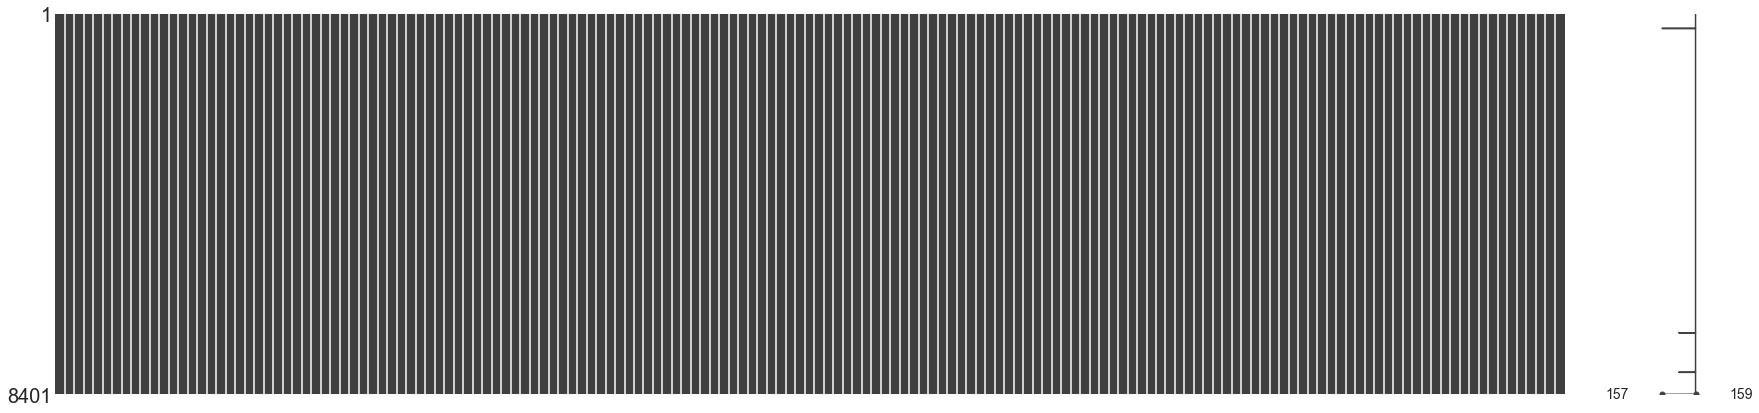

In [31]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_outfield
msno.matrix(df_fbref_outfield, figsize = (30, 7))

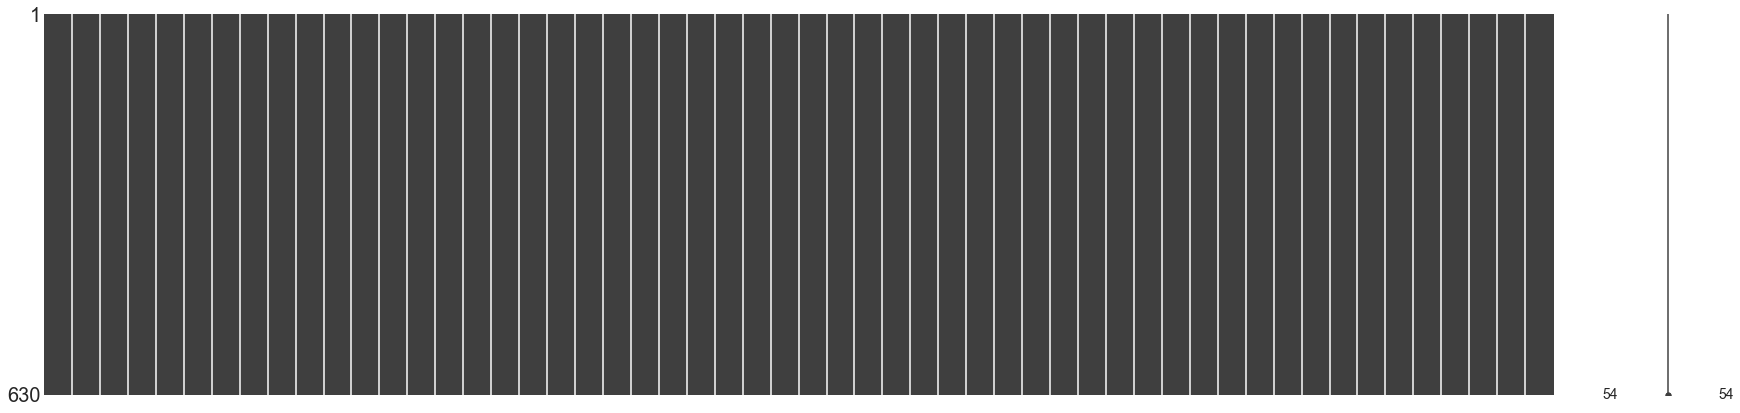

In [34]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_goalkeeper
msno.matrix(df_fbref_goalkeeper, figsize = (30, 7))

In [35]:
# Counts of missing values
null_value_stats = df_fbref_outfield.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

nationality_cleaned    3
position_cleaned       3
dtype: int64

In [36]:
# Counts of missing values
null_value_stats = df_fbref_goalkeeper.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

The visualisation shows us very quickly that there are no missing values in either of the datasets.

### <a id='#section3.3'>3.3. TransferMarkt</a>

#### <a id='#section3.3.1'>3.3.1. Import the Datasets</a>

In [37]:
df_tm_outfield = pd.read_csv('../../data/tm/engineered/player/outfield_big5_1920_30082020.csv')
df_tm_goalkeeper = pd.read_csv('../../data/tm/engineered/goalkeeper/goalkeeper_big5_1920_30082020.csv')

#### <a id='#section3.3.2'>3.3.2. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

## <a id='#section4'>4. Fuzzy Match Datasets - Record Linkage</a>

### <a id='#section4.1'>4.1. Introduction</a>
Now we have our two engineered DataFrames for [FBref](https://fbref.com/en/) and [TransferMarkt](https://www.transfermarkt.co.uk/) data, we are now read to merge them to form one dataset.

We have our cleaned datasets, however, matching of the data is still a tricky process. Let's take Lionel Messi as an example.

In the [FIFA 20](https://www.ea.com/en-gb/games/fifa/fifa-20) database, he has the short_name of L. Messi and a long_name of Lionel Andrés Messi Cuccittini. In [TransferMarkt](https://www.transfermarkt.co.uk/), his name is Lionel Messi.

There are no real set rules for players like this. For example, many South American players can be known by a one word moniker on [TransferMarkt](https://www.transfermarkt.co.uk/) e.g. Real Madrid's Casemiero, but then have their full names in the [FIFA 20](https://www.ea.com/en-gb/games/fifa/fifa-20) dataset - Carlos Henrique Venancio Casimiro.

We are then left in a state of trying to join two data sets together that do not have a common unique identifier.

However, to combat this, we can use a third-party Python library - [record linkage](https://pypi.org/project/recordlinkage/), installed using pip install recordlinkage. [record linkage](https://pypi.org/project/recordlinkage/) provides a simple interface to link records in or between data sources. The toolkit provides most of the tools needed for record linkage and deduplication. The package contains indexing methods, functions to compare records and classifiers. The package is developed for research and the linking of small or medium sized files.

For a full guide on how to use record linkage, see the official documentation [here](https://recordlinkage.readthedocs.io/en/latest/) and also this worked example by [Chris Moffitt](https://twitter.com/chris1610) [here](https://pbpython.com/record-linking.html)

Record Linkage steps:
1.    Preprocessing
2.    Indexing
3.    Comparing
4.    Classification
5.    Evaluation

#### What is Record Linkage as a concept - a definition
<b>'Record linkage'</b> is the term used by statisticians, epidemiologists, and historians, among others, to describe the process of joining records from one data source with another that describe the same entity ([source](https://en.wikipedia.org/wiki/Record_linkage)).

Record linkage is necessary when joining different data sets based on entities that may or may not share a common identifier (e.g., database key, URI, National identification number), which may be due to differences in record shape, storage location, or curator style or preference. A data set that has undergone RL-oriented reconciliation may be referred to as being cross-linked. Record linkage is referred to as data linkage in many jurisdictions, but the two are the same process.

### <a id='#section4.2'>4.2. Join the Datasets using Record Linkage</a>

#### <a id='#section4.2.1'>4.2.1. Outfielder Datasets</a>

#### 1) Indexing

Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-index.html

As the Record Linkage Toolkit has more configuration options, we need to perform a couple of steps to define the linkage rules. The first step is to create a indexer object.

The indexing module is used to make pairs of records. These pairs are called candidate links or candidate matches. There are several indexing algorithms available such as blocking and sorted neighborhood indexing. See the following references for background information about indexation

One key concept is that we can use blocking to limit the number of comparisons. For instance, we know that it is very likely that we only want to compare records that have the same last name, first name initial and birth year. We can use this knowledge to setup a block on these columns in both DataFrames:

In [75]:
# Record Linkage Step 1 - Create an indexer object
indexer = recordlinkage.Index()
indexer.block(left_on = ['firstinitial_lower', 'birth_year'], 
              right_on = ['firstinitial_lower', 'birth_year'])    # removed 'age' as they don't match in the two datasets

<Index>

The next step is to build up all the potential candidates to check:

In [76]:
# Record Linkage Step 2 - Build up all the potential candidates to check:
candidates = indexer.index(df_fbref_outfield, df_tm_outfield)
print(len(candidates))

83292


#### 2) Comparing
Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-compare.html

Now that we have defined the left and right data sets and all the candidates, we can define how we want to perform the comparison logic using `Compare()`:

In [77]:
# Record Linkage Step 3 - Define how we to perform the comparison logic
compare = recordlinkage.Compare()

compare.string('firstname_lower',
               'firstname_lower',
               method='levenshtein',
               threshold=0.60,
               label='first_name')
compare.string('lastname_lower',
               'lastname_lower',
               method='levenshtein',
               threshold=0.60,
               label='last_name')
compare.string('position_cleaned',
               'position_description_cleaned',
               method='levenshtein',
               threshold=0.70,
               label='position')
compare.string('nationality_cleaned',
               'playing_country',
               method='levenshtein',
               threshold=0.70,
               label='nationality')

features = compare.compute(candidates, df_fbref_outfield, df_tm_outfield)

View the potential candidates

In [78]:
# Record Linkage Step 4 - view the potential candidates
features

,,first_name,last_name,position,nationality
0,844,1.0,1.0,1.0,1.0
326,844,1.0,1.0,1.0,1.0
3060,844,1.0,1.0,1.0,1.0
5967,844,0.0,0.0,1.0,0.0
1,500,0.0,0.0,1.0,0.0
...,...,...,...,...,...
7167,461,1.0,0.0,1.0,1.0
8260,461,0.0,0.0,1.0,0.0
4718,79,1.0,1.0,1.0,1.0
5394,1971,1.0,1.0,1.0,1.0


This DataFrame shows the results of all of the comparisons. There is one row for each row in the Company House and Fan360 DataFrames. The columns correspond to the comparisons we defined. A 1 is a match and 0 is not.

Given the large number of records with no matches, it is a little hard to see how many matches we might have. We can sum up the individual scores to see about the quality of the matches.

In [79]:
# Sum up the individual scores to see the quality of the matches.
features.sum(axis=1).value_counts().sort_index(ascending=False)

4.0     4373
3.0     1124
2.0     4488
1.0    28439
0.0    44868
dtype: int64

To only include high-quality matches, let’s just take all the records with 4 matches out of 4 and create a total score column:

In [80]:
# Show records that have match by index number
potential_matches = features[features.sum(axis=1) == 4].reset_index()
potential_matches

,level_0,level_1,first_name,last_name,position,nationality
0,0,844,1.0,1.0,1.0,1.0
1,326,844,1.0,1.0,1.0,1.0
2,3060,844,1.0,1.0,1.0,1.0
3,1,728,1.0,1.0,1.0,1.0
4,260,698,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
4368,6807,1324,1.0,1.0,1.0,1.0
4369,8307,1638,1.0,1.0,1.0,1.0
4370,4718,79,1.0,1.0,1.0,1.0
4371,5394,1971,1.0,1.0,1.0,1.0


In [81]:
potential_matches['Score'] = potential_matches.loc[:, 'last_name': 'last_name'].sum(axis=1)

# Display DataFrame of potential matches, potential_matches 
potential_matches

,level_0,level_1,first_name,last_name,position,nationality,Score
0,0,844,1.0,1.0,1.0,1.0,1.0
1,326,844,1.0,1.0,1.0,1.0,1.0
2,3060,844,1.0,1.0,1.0,1.0,1.0
3,1,728,1.0,1.0,1.0,1.0,1.0
4,260,698,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
4368,6807,1324,1.0,1.0,1.0,1.0,1.0
4369,8307,1638,1.0,1.0,1.0,1.0,1.0
4370,4718,79,1.0,1.0,1.0,1.0,1.0
4371,5394,1971,1.0,1.0,1.0,1.0,1.0


#### 3) Classification
Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-classifiers.html

#### 4) Evaluation
Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html

#### 5) Next steps - joining the original datasets to create merged dataset
Next we join both original datasets by their index to this index to the potential matches DataFrame onto the corresponding level columns - level_0 and level_1. This then creates the joined DataFrame of Company House and Fan360 data.

In [82]:
# Join the Company House DataFrame to the potential matches DataFrame
df_merge_outfield = pd.merge(potential_matches, df_fbref_outfield, left_on='level_0', right_index=True)

# Join the Fan360 DataFrame to the potential matches DataFrame
df_merge_outfield = pd.merge(df_merge_outfield, df_tm_outfield, left_on='level_1', right_index=True)

Now that we've merged the DataFrames, the next step is to clean the DataFrame, reorder the columns, and only keep the columns of interest.

In [83]:
# Select columns of interest
cols_merge_outfield = ['player', 'nationality_cleaned', 'nationality_code', 'position_description', 'value', 'birth_date', 'age_y', 'Score']

# Create more concise DataFrame using only columns of interest
df_merge_outfield_select = df_merge_outfield[cols_merge_outfield]

# Order rows by 'company_id_ch' ascending and matching score decending (i.e. best matches of 5 out of 5 at the top) 
df_merge_outfield_select = df_merge_outfield_select.sort_values(by=['value', 'player'], ascending=[False, True])

In [84]:
df_merge_outfield_select

,player,nationality_cleaned,nationality_code,position_description,value,birth_date,age_y,Score
2949,Kylian Mbappé,France,FRA,Centre-Forward,162000000.0,1998-12-20,21,1.0
2951,Kylian Mbappé,France,FRA,Centre-Forward,162000000.0,1998-12-20,21,1.0
2952,Kylian Mbappé,France,FRA,Centre-Forward,162000000.0,1998-12-20,21,1.0
2953,Kylian Mbappé,France,FRA,Centre-Forward,162000000.0,1998-12-20,21,1.0
4289,Neymar,Brazil,BRA,Left Winger,115200000.0,1992-02-05,28,1.0
...,...,...,...,...,...,...,...,...
3467,Antonis Aidonis,Germany,GER,Centre-Back,NaN,2001-05-22,19,1.0
2570,Brandon Pierrick,England,ENG,Attacking Midfield,NaN,2001-12-10,18,1.0
668,Evann Guessand,France,FRA,Centre-Forward,NaN,2001-07-01,19,1.0
1323,Jake Vokins,England,ENG,Left-Back,NaN,2000-03-17,20,1.0


In [85]:
# Join the Company House DataFrame to the potential matches DataFrame
df_final = pd.merge(df_fbref_outfield, df_merge_outfield_select, left_on='player', right_on='player')

In [87]:
# Select columns of interest
cols_final = ['player', 'value', 'nationality_cleaned_y', 'position_description', 'squad', 'birth_date', 'age_y', 'games', 'games_starts', 'minutes', 'goals', 'assists', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red', 'goals_per90', 'assists_per90', 'goals_assists_per90', 'goals_pens_per90', 'goals_assists_pens_per90', 'xg', 'npxg', 'xa', 'xg_per90', 'xa_per90', 'xg_xa_per90', 'npxg_per90', 'npxg_xa_per90', 'minutes_90s', 'shots_total', 'shots_on_target', 'shots_free_kicks', 'shots_on_target_pct', 'shots_total_per90', 'shots_on_target_per90', 'goals_per_shot', 'goals_per_shot_on_target', 'npxg_per_shot', 'xg_net', 'npxg_net', 'passes_completed', 'passes', 'passes_pct', 'passes_total_distance', 'passes_progressive_distance', 'passes_completed_short', 'passes_short', 'passes_pct_short', 'passes_completed_medium', 'passes_medium', 'passes_pct_medium', 'passes_completed_long', 'passes_long', 'passes_pct_long', 'xa_net', 'assisted_shots', 'passes_into_final_third', 'passes_into_penalty_area', 'crosses_into_penalty_area', 'progressive_passes', 'passes_live', 'passes_dead', 'passes_free_kicks', 'through_balls', 'passes_pressure', 'passes_switches', 'crosses', 'corner_kicks', 'corner_kicks_in', 'corner_kicks_out', 'corner_kicks_straight', 'passes_ground', 'passes_low', 'passes_high', 'passes_left_foot', 'passes_right_foot', 'passes_head', 'throw_ins', 'passes_other_body', 'passes_offsides', 'passes_oob', 'passes_intercepted', 'passes_blocked', 'sca', 'sca_per90', 'sca_passes_live', 'sca_passes_dead', 'sca_dribbles', 'sca_shots', 'sca_fouled', 'gca', 'gca_per90', 'gca_passes_live', 'gca_passes_dead', 'gca_dribbles', 'gca_shots', 'gca_fouled', 'gca_og_for', 'tackles', 'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd', 'dribble_tackles', 'dribbles_vs', 'dribble_tackles_pct', 'dribbled_past', 'pressures', 'pressure_regains', 'pressure_regain_pct', 'pressures_def_3rd', 'pressures_mid_3rd', 'pressures_att_3rd', 'blocks', 'blocked_shots', 'blocked_shots_saves', 'blocked_passes', 'interceptions', 'clearances', 'errors', 'touches', 'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd', 'touches_att_pen_area', 'touches_live_ball', 'dribbles_completed', 'dribbles', 'dribbles_completed_pct', 'players_dribbled_past', 'nutmegs', 'carries', 'carry_distance', 'carry_progressive_distance', 'pass_targets', 'passes_received', 'passes_received_pct', 'miscontrols', 'dispossessed', 'cards_yellow_red', 'fouls', 'fouled', 'offsides', 'pens_won', 'pens_conceded', 'own_goals', 'ball_recoveries', 'aerials_won', 'aerials_lost', 'aerials_won_pct', 'Season', 'player_lower', 'firstname_lower', 'lastname_lower', 'firstinitial_lower', 'position_cleaned']

# Create more concise DataFrame using only columns of interest
df_final = df_final[cols_final]

# Order rows by 'company_id_ch' ascending and matching score decending (i.e. best matches of 5 out of 5 at the top) 
df_final = df_final.sort_values(by=['value', 'player'], ascending=[False, True])

In [88]:
# Rename columns
df_final = df_final.rename(columns={'nationality_cleaned_y': 'nationality',
                                    'position_description': 'position',
                                    'age_y': 'age',
                                    'squad': 'club' 
                                   }
                          )

In [89]:
df_final.shape

(12844, 158)

In [90]:
df_final = df_final.drop_duplicates()

In [91]:
df_final.shape

(4745, 158)

In [92]:
df_final

,player,value,nationality,position,club,birth_date,age,games,games_starts,minutes,...,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,player_lower,firstname_lower,lastname_lower,firstinitial_lower,position_cleaned
8395,Kylian Mbappé,162000000.0,France,Centre-Forward,Paris S-G,1998-12-20,21,20.0,17.0,1513.0,...,69.0,4.0,4.0,50.0,19/20,kylian mbappe,kylian,mbappe,k,Forward
8399,Kylian Mbappé,162000000.0,France,Centre-Forward,Paris S-G,1998-12-20,21,29.0,24.0,2343.0,...,80.0,2.0,5.0,28.6,18/19,kylian mbappe,kylian,mbappe,k,Forward
8403,Kylian Mbappé,162000000.0,France,Centre-Forward,Paris S-G,1998-12-20,21,27.0,24.0,2095.0,...,98.0,1.0,4.0,20.0,17/18,kylian mbappe,kylian,mbappe,k,Forward
8407,Kylian Mbappé,162000000.0,France,Centre-Forward,Monaco,1998-12-20,21,1.0,1.0,74.0,...,3.0,0.0,0.0,0.0,17/18,kylian mbappe,kylian,mbappe,k,Forward
9142,Neymar,115200000.0,Brazil,Left Winger,Paris S-G,1992-02-05,28,15.0,15.0,1318.0,...,89.0,5.0,5.0,50.0,19/20,neymar,neymar,neymar,n,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12515,Antonis Aidonis,NaN,Germany,Centre-Back,Stuttgart,2001-05-22,19,2.0,1.0,80.0,...,9.0,0.0,5.0,0.0,18/19,antonis aidonis,antonis,aidonis,a,Defender
9847,Brandon Pierrick,NaN,England,Attacking Midfield,Crystal Palace,2001-12-10,18,2.0,0.0,15.0,...,0.0,0.0,0.0,0.0,19/20,brandon pierrick,brandon,pierrick,b,Midfielder
1112,Evann Guessand,NaN,France,Centre-Forward,Nice,2001-07-01,19,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,20/21,evann guessand,evann,guessand,e,Forward
12042,Jake Vokins,NaN,England,Left-Back,Southampton,2000-03-17,20,1.0,1.0,90.0,...,8.0,0.0,0.0,0.0,19/20,jake vokins,jake,vokins,j,Defender


In [93]:
df_null = df_final.loc[pd.isnull(df_final).any(1),:]

In [94]:
df_null

,player,value,nationality,position,club,birth_date,age,games,games_starts,minutes,...,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,player_lower,firstname_lower,lastname_lower,firstinitial_lower,position_cleaned
12515,Antonis Aidonis,NaN,Germany,Centre-Back,Stuttgart,2001-05-22,19,2.0,1.0,80.0,...,9.0,0.0,5.0,0.0,18/19,antonis aidonis,antonis,aidonis,a,Defender
9847,Brandon Pierrick,NaN,England,Attacking Midfield,Crystal Palace,2001-12-10,18,2.0,0.0,15.0,...,0.0,0.0,0.0,0.0,19/20,brandon pierrick,brandon,pierrick,b,Midfielder
1112,Evann Guessand,NaN,France,Centre-Forward,Nice,2001-07-01,19,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,20/21,evann guessand,evann,guessand,e,Forward
12042,Jake Vokins,NaN,England,Left-Back,Southampton,2000-03-17,20,1.0,1.0,90.0,...,8.0,0.0,0.0,0.0,19/20,jake vokins,jake,vokins,j,Defender
2565,Mehdi Zerkane,NaN,France,Attacking Midfield,Bordeaux,1999-07-15,21,1.0,1.0,19.0,...,0.0,0.0,0.0,0.0,20/21,mehdi zerkane,mehdi,zerkane,m,Midfielder


On closer inspection, the player that have no matched are all youth team players that currently have no value of TransferMarkt, such as Neco Williams of Liverpool.

#### 4.4.4. Exporting the Joined DataFrame
Let's export the merged DataFrame, `df_fifa_tm_joined` as a CSV file.

In [95]:
df_final.to_csv(data_dir + '/fbref-tm/' + f'outfield_big5_last_updated_{today}.csv', index=None, header=True)

Now we have created a pandas DataFrame and wrangled the data to meet our needs, we'll next conduct and [Exploratory Data Analysis ](#section5) to determine the best value players in the [FIFA 20](https://www.ea.com/en-gb/games/fifa/fifa-20) database.

#### <a id='#section5.2.3'>5.2.3. Goalkeeper Datasets</a>

#### 1) Indexing

Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-index.html

As the Record Linkage Toolkit has more configuration options, we need to perform a couple of steps to define the linkage rules. The first step is to create a indexer object.

The indexing module is used to make pairs of records. These pairs are called candidate links or candidate matches. There are several indexing algorithms available such as blocking and sorted neighborhood indexing. See the following references for background information about indexation

One key concept is that we can use blocking to limit the number of comparisons. For instance, we know that it is very likely that we only want to compare records that have the same last name, first name initial and birth year. We can use this knowledge to setup a block on these columns in both DataFrames:

In [ ]:
# Record Linkage Step 1 - Create an indexer object
indexer = recordlinkage.Index()
indexer.block(left_on = ['firstinitial_lower', 'birth_year'], 
              right_on = ['firstinitial_lower', 'birth_year'])    # removed 'age' as they don't match in the two datasets

The next step is to build up all the potential candidates to check:

In [ ]:
# Record Linkage Step 2 - Build up all the potential candidates to check:
candidates = indexer.index(df_fbref_goalkeeper, df_tm_goalkeeper)
print(len(candidates))

#### 2) Comparing
Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-compare.html

Now that we have defined the left and right data sets and all the candidates, we can define how we want to perform the comparison logic using `Compare()`:

In [ ]:
# Record Linkage Step 3 - Define how we to perform the comparison logic
compare = recordlinkage.Compare()

compare.string('firstname_lower',
               'firstname_lower',
               method='levenshtein',
               threshold=0.60,
               label='first_name')
compare.string('lastname_lower',
               'lastname_lower',
               method='levenshtein',
               threshold=0.60,
               label='last_name')
compare.string('position_cleaned',
               'position_description_cleaned',
               method='levenshtein',
               threshold=0.70,
               label='position')
compare.string('nationality_cleaned',
               'playing_country',
               method='levenshtein',
               threshold=0.70,
               label='nationality')

df_features_goalkeeper = compare.compute(candidates, df_fbref_goalkeeper, df_tm_goalkeeper)

View the potential candidates

In [ ]:
# Record Linkage Step 4 - view the potential candidates
df_features_goalkeeper

This DataFrame shows the results of all of the comparisons. There is one row for each row in the Company House and Fan360 DataFrames. The columns correspond to the comparisons we defined. A 1 is a match and 0 is not.

Given the large number of records with no matches, it is a little hard to see how many matches we might have. We can sum up the individual scores to see about the quality of the matches.

In [ ]:
# Sum up the individual scores to see the quality of the matches.
df_features.sum(axis=1).value_counts().sort_index(ascending=False)

To only include high-quality matches, let’s just take all the records with more than 3 matches out of 5 and create a total score column:

In [ ]:
# Show records that have match by index number
df_potential_matches = df_features[df_features.sum(axis=1) == 4].reset_index()
df_potential_matches

In [ ]:
df_potential_matches['Score'] = df_potential_matches.loc[:, 'last_name': 'last_name'].sum(axis=1)

# Display DataFrame of potential matches, df_potential_matches 
df_potential_matches

#### 3) Classification
Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-classifiers.html

#### 4) Evaluation
Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html

#### 5) Next steps - joining the original datasets to create merged dataset
Next we join both original datasets by their index to this index to the potential matches DataFrame onto the corresponding level columns - level_0 and level_1. This then creates the joined DataFrame of Company House and Fan360 data.

In [67]:
# Join the Company House DataFrame to the potential matches DataFrame
df_merge = pd.merge(df_potential_matches, df_fbref_outfield, left_on='level_0', right_index=True)

# Join the Fan360 DataFrame to the potential matches DataFrame
df_merge = pd.merge(df_merge, df_tm_outfield, left_on='level_1', right_index=True)

NameError: name 'df_potential_matches' is not defined

In [68]:
df_merge

NameError: name 'df_merge' is not defined

Now that we've merged the DataFrames, the next step is to clean the DataFrame, reorder the columns, and only keep the columns of interest.

In [ ]:
# Select columns of interest
cols_merge = ['player', 'nationality_cleaned', 'nationality_code', 'position_description', 'value', 'birth_date', 'age_y', 'Score']

# Create more concise DataFrame using only columns of interest
df_merge_select = df_merge[cols_merge]

# Order rows by 'company_id_ch' ascending and matching score decending (i.e. best matches of 5 out of 5 at the top) 
df_merge_select = df_merge_select.sort_values(by=['value', 'player'], ascending=[False, True])

In [ ]:
df_merge_select

In [ ]:
# Join the Company House DataFrame to the potential matches DataFrame
df_final = pd.merge(df_fbref_outfield, df_merge_select, left_on='player', right_on='player')

In [ ]:
# Select columns of interest
cols_final = ['player', 'value', 'nationality_cleaned_y', 'position_description', 'squad', 'birth_date', 'age_y', 'games', 'games_starts', 'minutes', 'goals', 'assists', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red', 'goals_per90', 'assists_per90', 'goals_assists_per90', 'goals_pens_per90', 'goals_assists_pens_per90', 'xg', 'npxg', 'xa', 'xg_per90', 'xa_per90', 'xg_xa_per90', 'npxg_per90', 'npxg_xa_per90', 'minutes_90s', 'shots_total', 'shots_on_target', 'shots_free_kicks', 'shots_on_target_pct', 'shots_total_per90', 'shots_on_target_per90', 'goals_per_shot', 'goals_per_shot_on_target', 'npxg_per_shot', 'xg_net', 'npxg_net', 'passes_completed', 'passes', 'passes_pct', 'passes_total_distance', 'passes_progressive_distance', 'passes_completed_short', 'passes_short', 'passes_pct_short', 'passes_completed_medium', 'passes_medium', 'passes_pct_medium', 'passes_completed_long', 'passes_long', 'passes_pct_long', 'xa_net', 'assisted_shots', 'passes_into_final_third', 'passes_into_penalty_area', 'crosses_into_penalty_area', 'progressive_passes', 'passes_live', 'passes_dead', 'passes_free_kicks', 'through_balls', 'passes_pressure', 'passes_switches', 'crosses', 'corner_kicks', 'corner_kicks_in', 'corner_kicks_out', 'corner_kicks_straight', 'passes_ground', 'passes_low', 'passes_high', 'passes_left_foot', 'passes_right_foot', 'passes_head', 'throw_ins', 'passes_other_body', 'passes_offsides', 'passes_oob', 'passes_intercepted', 'passes_blocked', 'sca', 'sca_per90', 'sca_passes_live', 'sca_passes_dead', 'sca_dribbles', 'sca_shots', 'sca_fouled', 'gca', 'gca_per90', 'gca_passes_live', 'gca_passes_dead', 'gca_dribbles', 'gca_shots', 'gca_fouled', 'gca_og_for', 'tackles', 'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd', 'dribble_tackles', 'dribbles_vs', 'dribble_tackles_pct', 'dribbled_past', 'pressures', 'pressure_regains', 'pressure_regain_pct', 'pressures_def_3rd', 'pressures_mid_3rd', 'pressures_att_3rd', 'blocks', 'blocked_shots', 'blocked_shots_saves', 'blocked_passes', 'interceptions', 'clearances', 'errors', 'touches', 'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd', 'touches_att_pen_area', 'touches_live_ball', 'dribbles_completed', 'dribbles', 'dribbles_completed_pct', 'players_dribbled_past', 'nutmegs', 'carries', 'carry_distance', 'carry_progressive_distance', 'pass_targets', 'passes_received', 'passes_received_pct', 'miscontrols', 'dispossessed', 'cards_yellow_red', 'fouls', 'fouled', 'offsides', 'pens_won', 'pens_conceded', 'own_goals', 'ball_recoveries', 'aerials_won', 'aerials_lost', 'aerials_won_pct', 'Season', 'player_lower', 'firstname_lower', 'lastname_lower', 'firstinitial_lower', 'nationality_code', 'nationality_cleaned', 'position_cleaned']

# Create more concise DataFrame using only columns of interest
df_final = df_final[cols_final]

# Order rows by 'company_id_ch' ascending and matching score decending (i.e. best matches of 5 out of 5 at the top) 
df_final = df_final.sort_values(by=['value', 'player'], ascending=[False, True])

In [ ]:
# Rename columns
df_final = df_final.rename(columns={'nationality_cleaned_y': 'nationality',
                                    'position_description': 'position',
                                    'age_y': 'age',
                                    'squad': 'club' 
                                   }
                          )

In [ ]:
df_final.shape

In [ ]:
df_final = df_final.drop_duplicates()

In [ ]:
df_final.shape

In [ ]:
df_final

In [ ]:
df_null = df_final.loc[pd.isnull(df_final).any(1),:]

In [ ]:
df_null

On closer inspection, the player that have no matched are all youth team players that currently have no value of TransferMarkt, such as Neco Williams of Liverpool.

#### 4.4.4. Exporting the Joined DataFrame
Let's export the merged DataFrame, `df_fifa_tm_joined` as a CSV file.

In [ ]:
df_final.to_csv(data_dir + '/export/' + 'data_fbref_tm_outfield_joined.csv', index = None, header=True)

Now we have created a pandas DataFrame and wrangled the data to meet our needs, we'll next conduct and [Exploratory Data Analysis ](#section5) to determine the best value players in the [FIFA 20](https://www.ea.com/en-gb/games/fifa/fifa-20) database.m

#### <a id='#section4.2.1'>4.2.1. Outfielder Datasets</a>

## <a id='#section6'>6. Exploratory Data Analysis</a>

### <a id='#section6.1'>6.1. Introduction</a>
...

### <a id='#section6.2'>6.2. </a>

### <a id='#section6.3'>6.3. Radar Charts</a>
What is a radar? To quote Ted Knutson "It’s a way of visualizing a large number of stats at one time. In our case, the radars specifically deal with player stats". Radar charts are also known as spider charts or graphs because they can look like they make a spider web.

In football analysis and video games, radar charts have been popularised in a number of places, from the FIFA series, to Ted Knutson’s innovative ways of displaying player data.

Radar charts are an engaging way to show data that typically piques more attention than a bar chart although you can often use both of these to show the same data.

The following code uses the code from FC Python's guide to building Radar Charts in Matplotlib [here](https://fcpython.com/visualisation/radar-charts-matplotlib). This article runs through the creation of basic radar charts in Matplotlib, plotting the data scraped from FBref on data of a couple of players, before creating a function to streamline the process.

For more information on StatsBomb radars: https://statsbomb.com/2018/08/new-data-new-statsbomb-radars/

#### Create a DataFrame of data for Kevin De Bruyne and Jordan Henderson

Columns of interest:
*    Shot Touch% - The amount of shots a player takes as a proportion of their touches of the ball.
*    Pressure Regains - Times a player’s team won the ball back within 5 seconds of the player pressuring an opponent, per 90 minutes.
*    Pressures - The number of times a player pressures an opposition player per 90.
*    Aerial Wins - Number of aerial duels a player wins per 90 minutes.
*    Turnovers - How often a player loses the ball via a miscontrol or a failed dribble per 90 minutes.

In [ ]:
# Select columns of interest
# cols = ['xG90', 'Shots', 'Touches In Box', 'Shot Touch%', 'xG Assisted', 'Pressure Regains', 'Pressures', 'Aerial Wins', 'Turnovers', 'Successful Dribbles', 'xG/Shot']
# cols = ['xg_per90', 'shots_total', 'pressure_regains', 'pressures', 'aerials_won', 'dribbles', 'npxg_per_shot']
cols = ['player', 'xg_per90', 'shots_total', 'pressures', 'aerials_won', 'dribbles', 'npxg_per_shot']
df_outfield_select = df_outfield[cols]

In [ ]:
df_outfield_select.head()

In [ ]:
# Select only the players we wish to compare
lst_players = ['Kevin De Bruyne', 'Jordan Henderson']

# Filter DataFrame to only have 
data = df_outfield_select[df_outfield_select['player'].isin(lst_players)]

# Display the DataFrame
data.head()

#### Create Radar Chart for one player
Firstly, let’s do the easy bits and take a list of Attributes for our labels, along with a basic count of how many there are.

In [ ]:
Attributes = list(data)
AttNo = len(Attributes)

We then take a list of the values that we want to plot, then copy the first value to the end. When we plot the data, this will be the line that the radat follows – take a look below:

In [ ]:
values = data.iloc[1].tolist()
values += values [:1]
values

So these are the point that we will draw on our radar, but we will need to find the angles between each point for our line to follow. The formula below finds these angles and assigns them to ‘angles’. Then, just as above, we copy the first value to the end of our array to complete the line.

In [ ]:
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

Now that we have our values to plot, and the angles between them, drawing the radar is pretty simple.

Follow along with the comments below, but note the ‘polar=true’ in our subplot – this changes our chart from a more-traditional x and y axes chart, to a the circular radar chart that we are looking for.

In [ ]:
ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'teal', alpha=0.1)

#Give the plot a title and show it
ax.set_title('Jordan Henderson')
plt.show()

#### Comparing two sets of data in a radar chart
One additional benefit of the radar chart is the ability to compare two observations (or players, in this case), quite easily.

The example below repeats the above process for finding angles for Messi’s data points, then plots them both together.

In [ ]:
#Find the values and angles for Messi - from the table at the top of the page
values2 = data.iloc[0].tolist()
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

#Create the chart as before, but with both Ronaldo's and Messi's angles/values
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1],Attributes)

ax.plot(angles,values)
ax.fill(angles, values, 'teal', alpha=0.1)

ax.plot(angles2,values2)
ax.fill(angles2, values2, 'red', alpha=0.1)

#Rather than use a title, individual text points are added
plt.figtext(0.2,0.9, 'Henderson', color='red')
plt.figtext(0.2,0.85,"v")
plt.figtext(0.2,0.8, 'De Bruyne', color='teal')
plt.show()

#### Creating a function to plot individual players
This is a lot of code if we want to create multiple charts. We can easily turn these charts into a function, which will do all the heavy lifting for us – all we will have to do is provide it with a player name and data that we want to plot:

In [ ]:
# Function to plot just one player
def createRadar(player, data):
    Attributes = ["Defending","Dribbling","Pace","Passing","Physical","Shooting"]
    
    data += data [:1]
    
    angles = [n / 6 * 2 * pi for n in range(6)]
    angles += angles [:1]
    
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)
    ax.plot(angles,data)
    ax.fill(angles, data, 'blue', alpha=0.1)

    ax.set_title(player)
    plt.show()

In [ ]:
# Function to compare two players
def createRadar2(player, data, player2, data2):
    Attributes = ["Defending","Dribbling","Pace","Passing","Physical","Shooting"]
    
    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 6 * 2 * pi for n in range(6)]
    angles += angles [:1]
    
    angles2 = [n / 6 * 2 * pi for n in range(6)]
    angles2 += angles2 [:1]
    
    ax = plt.subplot(111, polar=True)

    #Create the chart as before, but with both Ronaldo's and Messi's angles/values
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'teal', alpha=0.1)

    ax.plot(angles2,values2)
    ax.fill(angles2, values2, 'red', alpha=0.1)

    #Rather than use a title, individual text points are added
    plt.figtext(0.2,0.9,player,color="teal")
    plt.figtext(0.2,0.85,"v")
    plt.figtext(0.2,0.8,player2,color="red")
    plt.show()

In [ ]:
createRadar("Dybala",[24,91,86,81,67,85])

In [ ]:
createRadar2("Henderson", [76,76,62,82,81,70], "Wilshere", [62,82,71,80,72,69])

#### Creating a function to plot individual players
This is a lot of code if we want to create multiple charts. We can easily turn these charts into a function, which will do all the heavy lifting for us – all we will have to do is provide it with a player name and data that we want to plot:

## <a id='#section7'>7. Summary</a>
This notebooks aims to demonstrate what is it to conduct an EDA with a new set of data using [pandas](http://pandas.pydata.org/) to create DataFrames, clean, wrangle the data, and [Seaborn](https://seaborn.pydata.org/) to plot the data.

In this workbook, we have taken a dataset of train data and through Exploratory Data Analysis, determined the following:
*    Identified how many of each journey are run per day,
*    Subsetted this table such that it contains the 16 most common journeys per date, and
*    Identified 28th August 2015 as the day that the timetable was changed *via* a visualisation.

## <a id='#section8'>8. Next Steps</a>
...

## <a id='#section9'>9. References</a>

### <a id='#section9.1'>9.1. Bibliography</a>

#### Data and Web Scraping
*    [FBref](https://fbref.com/) for the data to scrape
*    FBref statement for using StatsBomb's data: https://fbref.com/en/statsbomb/
*    [StatsBomb](https://statsbomb.com/) providing the data to FBref
*    [FBref_EPL GitHub repository](https://github.com/chmartin/FBref_EPL) by [chmartin](https://github.com/chmartin) for the original web scraping code
*    [Scrape-FBref-data GitHub repository](https://github.com/parth1902/Scrape-FBref-data) by [parth1902](https://github.com/parth1902) for the revised web scraping code for the new FBref metrics
*    [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann.
*    [06/04/2020: BBC - Premier League squads 'drop £1.6bn in value'](https://www.bbc.co.uk/sport/football/52221463).
*    [tyrone_mings GitHub repository](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://github.com/FCrSTATS)
*    [Python Package Index (PyPI) tyrone-mings library](https://pypi.org/project/tyrone-mings/).

#### Countries
*    [Comparison of alphabetic country codes Wiki](https://en.wikipedia.org/wiki/Comparison_of_alphabetic_country_codes)

#### Fuzzy Matching through Record Linkage
*    Record Linkage Wiki: https://en.wikipedia.org/wiki/Record_linkage
*    The Python Package Index (PyPI) repository for the Companies House API that lists all the important GET and LIST methods for requesting data: https://pypi.org/project/companies-house/
*    [Official Record Linkage documentation web](https://recordlinkage.readthedocs.io/en/latest/about.html)
*    [Official Record Linkage documentation PDF](https://readthedocs.org/projects/recordlinkage/downloads/pdf/stable/)
     -    [0. Preprocessing](https://recordlinkage.readthedocs.io/en/latest/ref-preprocessing.html)
     -    [1. Indexing](https://recordlinkage.readthedocs.io/en/latest/ref-index.html)
     -    [2. Comparing](https://recordlinkage.readthedocs.io/en/latest/ref-compare.html)
     -    [3. Classification](https://recordlinkage.readthedocs.io/en/latest/ref-classifiers.html)
     -    [4. Evaluation](https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html)
*    Evaluation:https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html
*    Companies House API docs: https://developer.companieshouse.gov.uk/api/docs/
*    Python Tools for Record Linking and Fuzzy Matching by Chris Moffitt: https://pbpython.com/record-linking.html
*    [Python Tools for Record Linking and Fuzzy Matching](https://pbpython.com/record-linking.html). For more information for record linking and fuzzy matching.
*    [Python Package Index (PyPI) Jellyfish library](https://pypi.org/project/jellyfish/).

#### Radar Charts
*    Code to create radar charts in matplotlib: https://fcpython.com/visualisation/radar-charts-matplotlib
*    Comparing Arsenal Midfielders + Explaining CM Radar Charts by Ted Knutson (23/01/2014): https://statsbomb.com/2014/01/comparing-arsenal-midfielders-explaining-cm-radar-charts/
*    Radar Love: Box-to-Box Midfielders by Ted Knutson (16/02/2014): https://statsbomb.com/2014/02/radar-love-box-to-box-midfielders/
*    Radar Love: Robben, Reus, Sanchez, Navas, Firmino, Griezmann by Ted Knutson (12/04/2014): https://statsbomb.com/2014/04/radar-love-robben-reus-sanchez-navas-firmino-griezmann/
*    New Radars, Better Rigor plus The Average Player by Ted Knutson (22/04/2014): https://statsbomb.com/2014/04/new-radars-better-rigor-plus-the-average-player/
*    Introducing and Explaining Fullback Radars. Sagna, Debuchy, Lahm, Alves and More by Ted Knutson (16/07/2014): 
*    Understanding Football Radars For Mugs and Muggles by Ted Knutson (25/04/2016): https://statsbomb.com/2016/04/understand-football-radars-for-mugs-and-muggles/
*    Revisiting Radars by Ted Knutson (18/05/2017): https://statsbomb.com/2017/05/revisiting-radars/
*    New Data, New StatsBomb Radars by Ted Knutson (03/08/2018): https://statsbomb.com/2018/08/new-data-new-statsbomb-radars/
*    Radar Wars by Ted Knutson (04/09/2018): https://statsbomb.com/2018/09/radar-wars/. Accompanying presentation: https://www.youtube.com/watch?v=iN-QqnbrDYA 
*    Introducing Goalkeeper Radars by Ted Knutson (11/12/2018): https://statsbomb.com/2018/12/introducing-goalkeeper-radars/
*    Under the Radar xG Stories: Gabriel Jesus Struggles, Eintracht Frankfurt's Three Stars, and Kevin Gameiro's Quietly Strong Season by Mike Goodman (17/04/2019): https://statsbomb.com/2019/04/under-the-radar-xg-stories-gabriel-jesus-struggles-eintracht-frankfurts-three-stars-and-kevin-gameiros-quietly-strong-season/
*    Creating a Radar Chart with Tableau and Python by Evelina Judeikyte (16/04/2020): https://www.evelina-judeikyte.com/blog/2020/radar-chart-in-two-tools
*    Football Data Visualisation: Women’s World Cup 2019 by Damian Cummins (15/07/2019): https://medium.com/@DamianC_/football-data-visualisation-womens-world-cup-2019-f025c1009805
*    Python Graph Gallery - Radar charts: https://python-graph-gallery.com/radar-chart/
     -    #390 Basic radar chart: https://python-graph-gallery.com/390-basic-radar-chart/
     -    #391 Radar chart with several individuals: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
     -    #392 Use faceting for Radar chart: https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
*    Radar Charts in Plotly: https://plotly.com/python/radar-chart/
*    Plotly - Polar Chart and Radar Chart tutorial by Tutorials Point: https://www.tutorialspoint.com/plotly/plotly_polar_chart_and_radar_chart.htm
*    Luke Bornn tweet about Radar charts: https://twitter.com/lukebornn/status/864856335191388162
*    Daryl Morey tweet about Radar charts: https://twitter.com/dmorey/status/864857759069732864
*    Edward Tufte tweet about Radar charts: https://twitter.com/EdwardTufte/status/876606767198855169
*    FC rSTATS tweet about Radar charts: https://twitter.com/fc_rstats/status/1111088481617485825
*    FootballSlices.com: https://www.footballslices.com/ and accompanying Twitter account: https://twitter.com/footballslices
*    StatsBomb Radar for Lionel Messi, Barcelona 2018-19: https://twitter.com/StatsBomb/status/1141760656825356288/

## <a id='#section9.2'>9.2. Python Techniques Observed</a>
To conduct our analysis, we have used the following libraries and modules for the following tasks:
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion,
*    [Seaborn](https://seaborn.pydata.org/) for plotting visualisations,
*    [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for scraping data from webpages, and
*    [fuzzymatcher](https://github.com/RobinL/fuzzymatcher) for linking fuzzy datasets.

We have also demonstrated an array of techniques in Python using the following methods and functions:
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    The [missingno](https://pypi.org/project/missingno/) library to visualise how many missing values we have in the dataset, and
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files.

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)